In [2]:
#this Python file using UTF-8 encoding
import numpy as np
from matplotlib import pyplot as plt
from math import floor

In [3]:
def make_sample(f, start=0, end=2*np.pi, n=100):
    if isinstance(start, int) or isinstance(start, float):
        x = np.linspace(start, end, n)
        fx = np.array([f(x_) for x_ in x])
        return fx
    else:
        fx = np.array([f(x_) for x_ in start])
        

def null_noise(n):
    return np.array([0 for i in range(n)])




# Преобразование Фурье за $O(n^2)$
Для каждого элемента массива $coef$ вычичляем сумму всех частот.

In [4]:
# 

def polynomial(coeffs, x):
    return sum(a * x ** k for k, a in enumerate(coeffs))


def ft(coeffs):
    l = len(coeffs)
    return [
            polynomial(coeffs, np.cos(2*np.pi*k/l) + 1j*np.sin(2*np.pi*k/l))
            for k in range(l)]

# Преобразование фурье за $O(n\log{n})$

In [5]:
def omega(k, n):
    return np.cos(2 * np.pi * k / n) + 1j * np.sin(2 * np.pi * k / n)


def fft(coefs):
    if len(coefs) > 1:  # рекурсивно спускаемся пока не дойдем до двухточечного случая
        l = len(coefs)
        every_two_1 = fft(coefs[::2])
        every_two_2 = fft(coefs[1::2])
        
        X_0 = [every_two_1[k] + every_two_2[k] * omega(k, l) for k in range(l//2)]
        X_1 = [every_two_1[k] - every_two_2[k] * omega(k, l) for k in range(l//2)]
        X_0.extend(X_1)
        return X_0
    else:
        return coefs

# Обратное преобразование фурье $O(nlogn)$

In [6]:
def t_fft(coefs):
    if len(coefs) > 1:  # рекурсивно спускаемся пока не дойдем до двухточечного случая
        l = len(coefs)
        every_two_1 = fft(coefs[::2])
        every_two_2 = fft(coefs[1::2])
        
        X_0 = [(every_two_1[k] + every_two_2[k] * omega(k, l))/l for k in range(l//2)]
        X_1 = [(every_two_1[k] - every_two_2[k] * omega(k, l))/l for k in range(l//2)]
        X_0.extend(X_1)
        return X_0
    else:
        return coefs

In [7]:
def f(x, noise=0):
    return np.sin(x*8)

1024


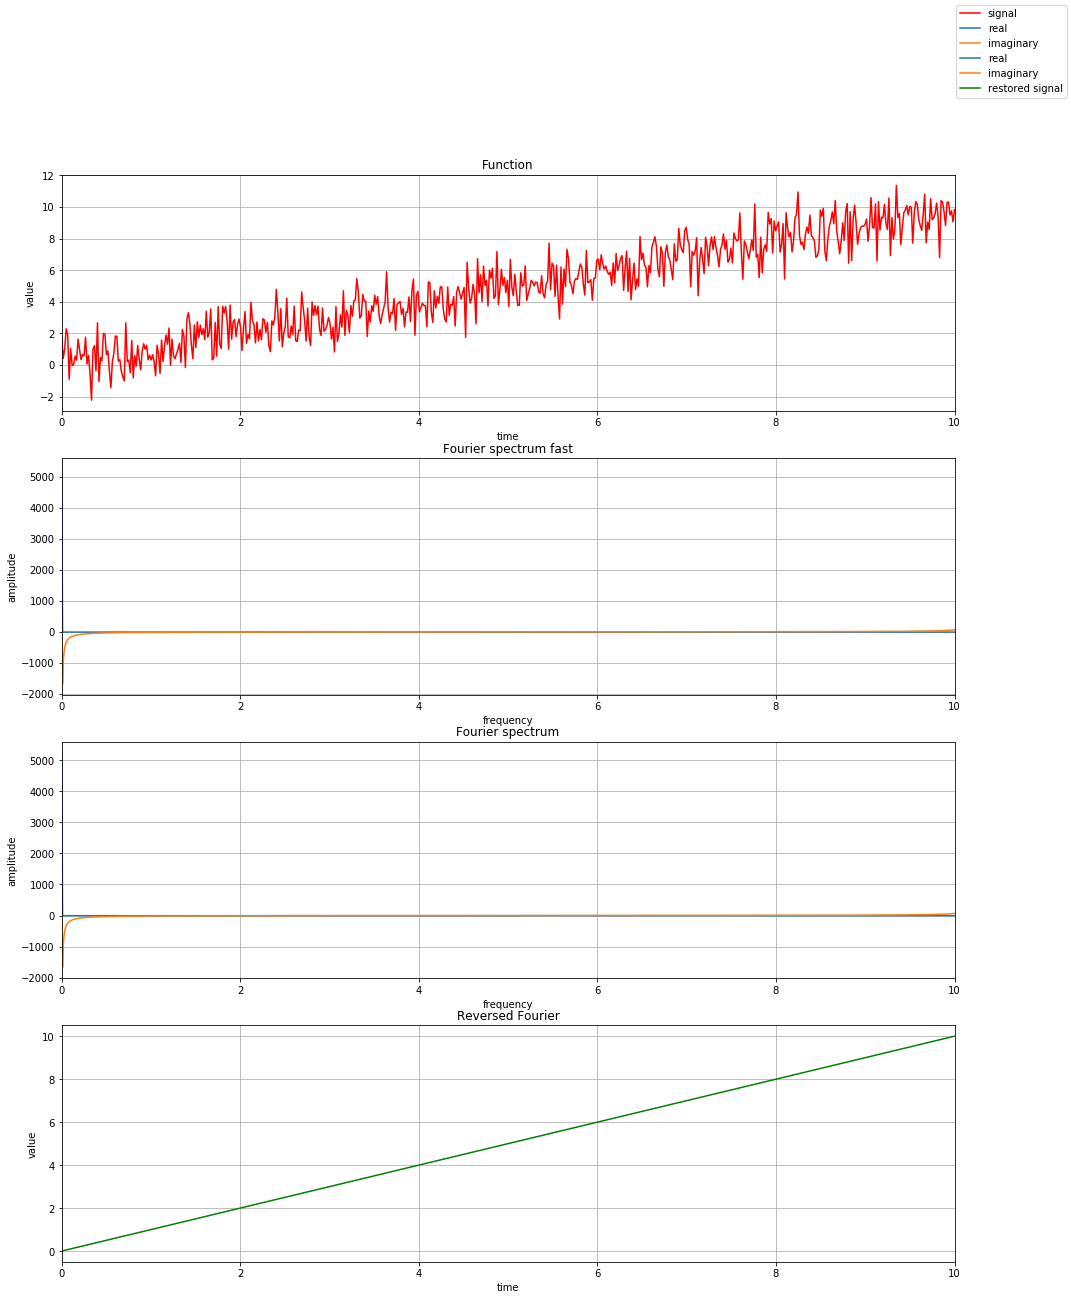

In [8]:
def f(x, noise=0):
    return x



np.random.seed(0)
n = 2**10
noise = np.random.randn
sigma = 1
mu = 0
start = 0
end = 10

n = 1000
to_sample = 0
if np.log2(n) % 1 != 0:
    new_n = 2 ** int(np.log2(n) // 1 + 1)
    new_end = end * new_n / n
coefs = make_sample(f, start, new_end, new_n)
print(len(coefs))



x_1 = np.linspace(start, end, 600)

fig, ax = plt.subplots(4, 1, figsize=(16, 20))
y_plot = np.array([f(x) for x in x_1]) + noise(600) * sigma + mu
ax[0].set_title('Function')
ax[0].plot(np.linspace(start, end, 600), y_plot, label='signal', color='r')
ax[0].set_xlim(start, end, 2*np.pi)
ax[0].grid()
ax[0].set_xlabel('time')
ax[0].set_ylabel('value')

#coefs = make_sample(f, start=start, end=end, n=n) + noise(n) * sigma + mu
fft_array = fft(coefs)
fft_real = [F.real for F in fft_array]
fft_imag = [F.imag for F in fft_array]
ax[1].set_title('Fourier spectrum fast')
ax[1].set_xlabel('frequency')
ax[1].set_ylabel('amplitude')
ax[1].set_xlim(start, end)
ax[1].plot(np.linspace(start, end, n), fft_real[:n], label='real')
ax[1].plot(np.linspace(start, end, n), fft_imag[:n], label='imaginary')
ax[1].grid()
ax[2].set_title('Fourier spectrum')
ft_array = ft(coefs)
ft_real = [F.real for F in ft_array]
ft_imag = [F.imag for F in ft_array]
ax[2].plot(np.linspace(start, end, n), ft_real[:n], label='real')
ax[2].plot(np.linspace(start, end, n), ft_imag[:n], label='imaginary')
ax[2].set_xlabel('frequency')
ax[2].set_ylabel('amplitude')
ax[2].set_xlim(start, end)
ax[2].grid()
rest_sig_fourier = ft_array
rft_real = [X.real for X in t_fft(rest_sig_fourier)]
ax[3].set_title('Reversed Fourier')
ax[3].plot(np.linspace(start, end, n), rft_real[::-1][:n], label='restored signal', color='g')
ax[3].set_xlim(start, end)
ax[3].set_xlabel('time')
ax[3].set_ylabel('value')
ax[3].grid()
fig.legend()

In [77]:
n = 10
to_sample = 0
if np.log2(n) % 1 != 0:
    new_n = 2 ** int(np.log2(n) // 1)
    to_sample = n - new_n
    print(new_n)
else:
    new_n = n

coefs = np.concatenate((np.array(make_sample(f, start=start, end=end, n=new_n)),(np.array([0 for i in range(to_sample)]))))


8
[ 0.          1.42857143  2.85714286  4.28571429  5.71428571  7.14285714
  8.57142857 10.          0.          0.        ]


In [ ]:
def restore_signal(coef):
    return [x if x.real > 0.3*max(coef).real else 0 for x in coef]